In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

###**Q1."Binary"pur Agent**###

The height of kids is distributed between 2 to 4.5.It is as follows : 

In [2]:
data_kid = np.zeros((13,2))
data_kid[0] = [2.0,1.0]
data_kid[1] = [2.2,9.0]
data_kid[2] = [2.4,0.5]
data_kid[3] = [2.6,5.0]
data_kid[4] = [2.8,4.5]
data_kid[5] = [3.0,15]
data_kid[6] = [3.2,0.8]
data_kid[7] = [3.4,4.2]
data_kid[8] = [3.6,13]
data_kid[9] = [3.8,7.0]
data_kid[10] = [4.0,22]
data_kid[11] = [4.2,8.0]
data_kid[12] = [4.4,10]
#storing the prefix sum percentages for kids in a numpy array.
prefix_sum_kids = np.zeros(13)
for i in range(13):
  if (i == 0):
    prefix_sum_kids[i] = data_kid[i][1]
  else :
    prefix_sum_kids[i] += prefix_sum_kids[i-1] + data_kid[i][1]

In [3]:
#to printing the array in a tabular form for easy viewing.
print(tabulate(data_kid,headers = ["Height","% of kids in that height"]))

  Height    % of kids in that height
--------  --------------------------
     2                           1
     2.2                         9
     2.4                         0.5
     2.6                         5
     2.8                         4.5
     3                          15
     3.2                         0.8
     3.4                         4.2
     3.6                        13
     3.8                         7
     4                          22
     4.2                         8
     4.4                        10


The height of adults is distributed between 4.6 to 7.It is as follows :

In [4]:
data_adult = np.zeros((13,2))
data_adult[0] = [4.6,0.5]
data_adult[1] = [4.8,0.5]
data_adult[2] = [5,3]
data_adult[3] = [5.2,2]
data_adult[4] = [5.4,7]
data_adult[5] = [5.6,22]
data_adult[6] = [5.8,25]
data_adult[7] = [6,20]
data_adult[8] = [6.2,7]
data_adult[9] = [6.4,5]
data_adult[10] = [6.6,4]
data_adult[11] = [6.8,3]
data_adult[12] = [7,1]
#storing the prefix sum percentages for adults in a numpy array.
prefix_sum_adults = np.zeros(13)
for i in range(13):
  if (i == 0):
    prefix_sum_adults[i] = data_adult[i][1]
  else :
    prefix_sum_adults[i] += prefix_sum_adults[i-1] + data_adult[i][1]

In [5]:
#to printing the array in a tabular form for easy viewing.
print(tabulate(data_adult,headers = ["Height","% of adults in that height"]))

  Height    % of adults in that height
--------  ----------------------------
     4.6                           0.5
     4.8                           0.5
     5                             3
     5.2                           2
     5.4                           7
     5.6                          22
     5.8                          25
     6                            20
     6.2                           7
     6.4                           5
     6.6                           4
     6.8                           3
     7                             1


**height_k :**This function takes an integer(which is a random number) as its input and returns the height of the kid based on the prefix sum percentages of the kids.

In [6]:
def height_k(h):
  for i in range(13):
    if (h <= prefix_sum_kids[i]):
      return data_kid[i][0]

**height_a :**This function takes an integer(which is a random number) as its input and returns the height of the adult based on the prefix sum percentages of the adults.

In [7]:
def height_a(h):
  for i in range(13):
    if (h <= prefix_sum_adults[i]):
      return data_adult[i][0]

p_kid is the probability of finding a kid in the village.We then generate a random number for generating the state of a person(i.e if he's a kid or an adult).Now we generate a random height based on the state.
*   If he's a kid,we randomly generate height between 2 to 4.4
*   If he's an adult,we randomly generate height between 4.6 to 7
Then action of the agent is a randomly generated integer between [0,1].

**Reward Scheme :**

The reward r_t = R(s_t,a_t).

R(0,0) = 1,R(1,1) = 1,R(0,1) = 0,R(1,0) = 0, i.e., if the prediction is correct then reward is 1, else it is 0.

We simulate this process for t = 1 to 1000.



In [8]:
p_kid = float(input("Enter the probability of a person being a kid : "))
data = np.zeros((1000,5))#numpy array of size (1000,5) initialized to 0.
kid_height = []#list to store the heights of kids,which is later used for plotting.
adult_height = []#list to store the heights of adults,which is later used for plotting.
for i in range(1000):
  check = np.random.rand()#random number for assigning the state.
  if (check <= p_kid):#if less than p_kid,s_t = 0
    s_t = 0
  else :#else s_t = 1
    s_t = 1
    
  percent = np.random.randint(0,101)#random integer for assigning the height of the person.
  if (s_t == 0):#if its a kid,use height_k func.
    h_t = height_k(percent)
    kid_height.append(h_t)
  else :#else use height_a func.
    h_t = height_a(percent)
    adult_height.append(h_t)
  a_t = np.random.randint(0,2)#random integer for assigning the action of the robot.
  if (a_t == s_t):#reward accordingly
    r_t = 1
  else : 
    r_t = 0 
  #inserting time(t),state at t,height,action at t and reward into the list for each iteration.
  data[i][0] = i+1
  data[i][1] = s_t 
  data[i][2] = h_t
  data[i][3] = a_t
  data[i][4] = r_t

Enter the probability of a person being a kid : 0.6


1.Printing the data which contains time(t) , s_t , h_t , a_t , r_t.

In [19]:
#printing the data in a tabular form for easy viewing.
print(tabulate(data,headers = ["Time(t)","s_t","h_t","a_t","r_t"]))

  Time(t)  s_t       h_t  a_t          r_t
---------  ------  -----  ---------  -----
        1  (2, 1)      0  RIGHT          0
        2  (3, 1)      0  RIGHT          0
        3  (2, 1)      0  LEFT           0
        4  (3, 1)      0  RIGHT          0
        5  (4, 1)      0  RIGHT          0
        6  (4, 1)      0  PICK-DIRT     -1
        7  (3, 1)      0  LEFT          -1
        8  (4, 1)      0  RIGHT         -1
        9  (4, 1)      0  PICK-DIRT     -2
       10  (5, 1)      0  RIGHT         -2
       11  (4, 1)      0  LEFT          -2
       12  (3, 1)      0  LEFT          -2
       13  (3, 2)      0  UP            -2
       14  (3, 1)      0  DOWN          -2
       15  (2, 1)      0  LEFT          -2
       16  (2, 0)      0  DOWN          -2
       17  (2, 0)      0  PICK-DIRT     -3
       18  (2, 0)      0  PICK-DIRT     -4
       19  (3, 0)      0  RIGHT         -4
       20  (4, 0)      0  RIGHT         -4
       21  (5, 0)      0  RIGHT         -4
       22  

2.Plotting the histograms of heights of kids and adults generated during the simulation.

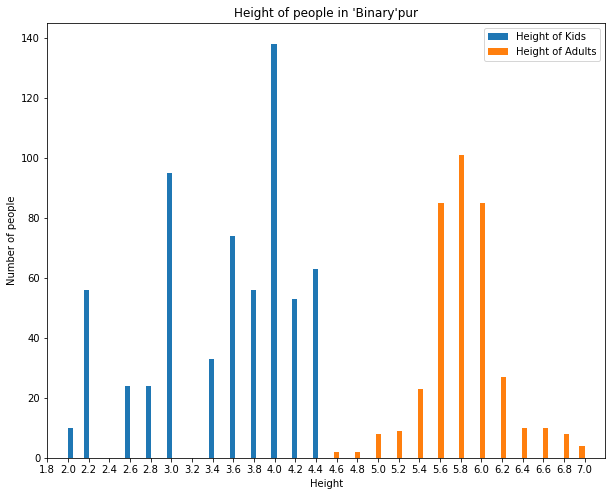

In [10]:
bins = np.linspace(2,7,100)#to make the histogram evenly spaced
plt.figure(figsize=(10,8))#increasing the size of the figure to (10,8)
plt.hist(kid_height,bins,label = "Height of Kids")
plt.hist(adult_height,bins,label = "Height of Adults")
plt.xlim([1.8, 7.2])#range is from 1.8 to 7.2 feet.
plt.xticks(np.arange(1.8, 7.2, 0.2))#to mark the x - axis
plt.title("Height of people in 'Binary'pur")
plt.xlabel("Height")
plt.ylabel("Number of people")
plt.legend()

Storing the cummulative reward for each t in a numpy array.

In [11]:
cummulative_reward = np.zeros(1000)
for i in range(1000):
  if (i == 0):
    cummulative_reward[i] = data[i][4]
  else : 
    cummulative_reward[i] += cummulative_reward[i-1] + data[i][4]

3.Plotting the performance of the agent i.e average reward.

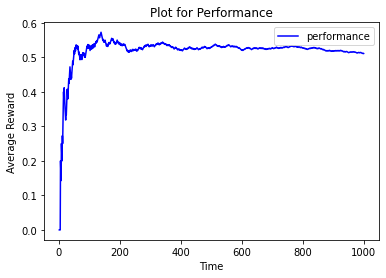

In [12]:
plt.plot(data[:,0],cummulative_reward[:]/data[:,0],'b',label = "performance")
plt.title("Plot for Performance")
plt.xlabel("Time")
plt.ylabel("Average Reward")
plt.legend()

============================================================================================================

###**Q2.Dynamic Control Task: Room Cleaner Robot**###

First,we take in the length and width of the room as the input and create a grid of size (x_size x y_size) initialized with 0 in each grid point implying that it is clean room.

In [13]:
x_size = int(input("Enter length of the grid : "))
y_size = int(input("Enter width of the grid  : "))
grid = np.zeros((x_size,y_size))
grid

Enter length of the grid : 10
Enter width of the grid  : 10


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Now we place the dirt in 10 random locations in the room.For this,we generate a random point (x,y) and the amount of dirt using **random.randint**.We then place the dirt in the grid.

In [14]:
for i in range(10):
  x = np.random.randint(0,10)#x-coordinate of the dirt.
  y = np.random.randint(0,10)#y-coordinate of the dirt.
  amount = np.random.randint(1,50)#amount of dirt.
  print((x,y,amount))
  grid[x][y] = amount#placing the dirt in the grid.

(4, 3, 34)
(8, 2, 27)
(0, 9, 8)
(0, 2, 33)
(8, 6, 24)
(8, 1, 21)
(8, 5, 16)
(7, 3, 32)
(6, 4, 9)
(9, 2, 49)


The room now has points whose value is 0(clean part) and non-zero(dirt is present in this point).

In [15]:
grid

array([[ 0.,  0., 33.,  0.,  0.,  0.,  0.,  0.,  0.,  8.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 34.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 32.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 21., 27.,  0.,  0., 16., 24.,  0.,  0.,  0.],
       [ 0.,  0., 49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Here,we simulate the movement of the robot from t = 1 to t = 100.For every time t,we generate a random variable "temp" between (0,5).

(i)If temp = 0,the robot moves up.

(ii)If temp = 1,the robot moves down.

(iii)If temp = 2,the robot moves right.

(iv)If temp = 3,the robot moves left.

(v)If temp = 4,the robot pick the dirt.

**Reward Scheme :**

1.When the robot hits the walls of the room(i.e tries to go outside the grid),we give a penality of -10(i.e decrease current reward by 10).

2.If the robot tries ot pick dirt from a clean place,we give a penality of -1.

3.If the robot picks the dirt,then we reward it with points equal to amount of dirt picked up.

In [16]:
x_0 = int(input("Enter x coordinate of the robot : "))#initial x-coordinate of robot.
y_0 = int(input("Enter y coordinate of the robot : "))#initial y-coordinate of robot.
data = [[] for i in range(100)]#creating a empty list.
actions = ["UP","DOWN","RIGHT","LEFT","PICK-DIRT"]#the actions that can be done by the robot.
reward = 0#reward for cleaning the dirt.
for i in range(100):
  temp = np.random.randint(0,5)#for choice of action.
  if (temp == 0):#move up
    if (y_0 + 1 <= y_size-1):#if robot lies inside the room after the action.
      y_0 += 1
    else :#else reduce reward.
      reward -= 10
  elif (temp == 1):#move down
    if (y_0 - 1 >= 0):
      y_0 -= 1
    else :
      reward -= 10
  elif (temp == 2):#move right
    if (x_0 + 1 <= x_size-1):
      x_0 += 1
    else :
      reward -= 10
  elif (temp == 3):#move left
    if (x_0 - 1 >= 0):
      x_0 -= 1
    else :
      reward -= 10
  else : #pick-dirt
    if (grid[x_0][y_0] != 0):
        reward += grid[x_0][y_0]
        grid[x_0][y_0] = 0
    else :
        reward -= 1  
  #inserting time(t),position,amount of dirt,action and reward into the list for each iteration.
  data[i].insert(0,i+1)
  data[i].insert(1,(x_0,y_0))
  data[i].insert(2,grid[x_0][y_0])
  data[i].insert(3,actions[temp])
  data[i].insert(4,reward)

Enter x coordinate of the robot : 1
Enter y coordinate of the robot : 1


1.Printing the activity at each time t = 1, . . . ,100, location of the agent, dirt in each location,action of the agent and the reward obtained.

In [17]:
#printing the data in a tabular form for easy viewing.
print(tabulate(data,headers = ["Time(t)","Location of Agent","Dirt in location","Action","Reward"]))

  Time(t)  Location of Agent      Dirt in location  Action       Reward
---------  -------------------  ------------------  ---------  --------
        1  (2, 1)                                0  RIGHT             0
        2  (3, 1)                                0  RIGHT             0
        3  (2, 1)                                0  LEFT              0
        4  (3, 1)                                0  RIGHT             0
        5  (4, 1)                                0  RIGHT             0
        6  (4, 1)                                0  PICK-DIRT        -1
        7  (3, 1)                                0  LEFT             -1
        8  (4, 1)                                0  RIGHT            -1
        9  (4, 1)                                0  PICK-DIRT        -2
       10  (5, 1)                                0  RIGHT            -2
       11  (4, 1)                                0  LEFT             -2
       12  (3, 1)                                0  LEFT        

2.Plotting the average peformance of the agent with respect to time(t).

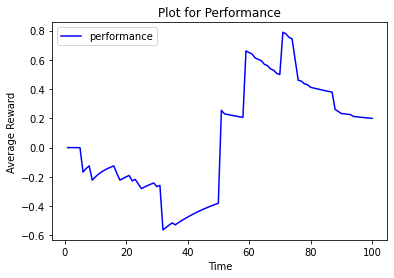

In [18]:
#since data is a list,we convert into a numpy array.
plt_data = np.zeros((100,2))
for i in range(100):
  plt_data[i][0] = data[i][0]
  plt_data[i][1] = data[i][4]

a = np.array(plt_data)#numpy array 'a' is of the size(100,2) of the form (time,curr_reward).
#plotting using the numpy array.
plt.plot(a[:,0],a[:,1]/a[:,0],'b',label = "performance")
plt.title("Plot for Performance")
plt.xlabel("Time")
plt.ylabel("Average Reward")
plt.legend()